In [58]:
# train_dir = './dataset/new/hanacaraka/data/'
# train_dir = './dataset/new/aksara_jawa_modified/data/'
train_dir = './dataset/merged/data/'

In [59]:
import tensorflow as tf

IMAGE_SIZE = 300

In [60]:
import os

# Collect the class names
class_names = sorted(os.listdir(train_dir))
n_classes = len(class_names)

# Show
print(f"Total number of classes: {n_classes}")
print(f"Classes: {class_names}")

Total number of classes: 20
Classes: ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']


In [61]:
def load_and_preprocess_image(image, label):    
    # Resize the image to the desired size
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    
    # Rescale pixel values to be in the range [0, 1]
    image = tf.image.per_image_standardization(image)
    
    return image, label

In [70]:
import tensorflow as tf

# Create a dataset from the data directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
)

train_dataset_mapped = train_dataset.map(load_and_preprocess_image)

Found 4213 files belonging to 20 classes.


In [67]:
import plotly.express as px
import matplotlib.pyplot as plt


# Calculate class distribution
class_dis = [len(os.listdir(train_dir + name)) for name in class_names]

# Visualize using interactive pie chart
pie_chart = px.pie(values=class_dis, names=class_names, color=class_names)
pie_chart.update_layout({'title':{'text':"Class Distribution"}})
pie_chart.show()

# Visualize using interactive bar chart
bar_chart = px.bar(y=class_dis, x=class_names, color=class_names)
bar_chart.show()

In [68]:
import numpy as np

def plot_images(dataset: tf.data.Dataset, n_rows: int = 5, n_cols: int = 4, class_names=class_names, figsize=(20, 20), model=None, check=False):
    """
    Plots a grid of images and their corresponding labels from a tf.data.Dataset object.

    Args:
        dataset (tf.data.Dataset): A TensorFlow dataset object containing the images and labels to plot.
        n_rows (int): Number of rows in the plot grid. Default is 1.
        n_cols (int): Number of columns in the plot grid. Default is 4.
        class_names (list): A list of strings mapping the integer labels to their corresponding class names. Default is None.
        figsize (tuple): A tuple specifying the size of the figure. Default is (10, 10).
    """
    images, labels = next(iter(dataset))
    
    # Create a figure to display the images
    fig = plt.figure(figsize=figsize)
    
    # Loop over the number of rows and columns
    for i in range(n_rows * n_cols):
        
        label = int(labels[i].numpy())
        title = "true: "+class_names[label]
        
        if model:
            pred = model.predict(images[i][np.newaxis])
            
            if check:
                if label == np.argmax(pred):
                    continue
            
            pred_label = f"Pred: {np.argmax(pred)}"
            pred_percentage = f" ({np.max(pred) * 100:.2f}%)"
            if class_names:
                pred_label += f" ({class_names[np.argmax(pred)]})"
            title += f"\n{pred_label} {pred_percentage}"
            
        # Create a subplot for each image
        ax = fig.add_subplot(n_rows, n_cols, i+1)    
        
        # Plot the image
        ax.imshow(images[i].numpy().astype("uint8"))
        
        # Set the title to the corresponding label
        ax.set_title(title)
        
        # Remove the axis ticks
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Show the plot
    plt.show()

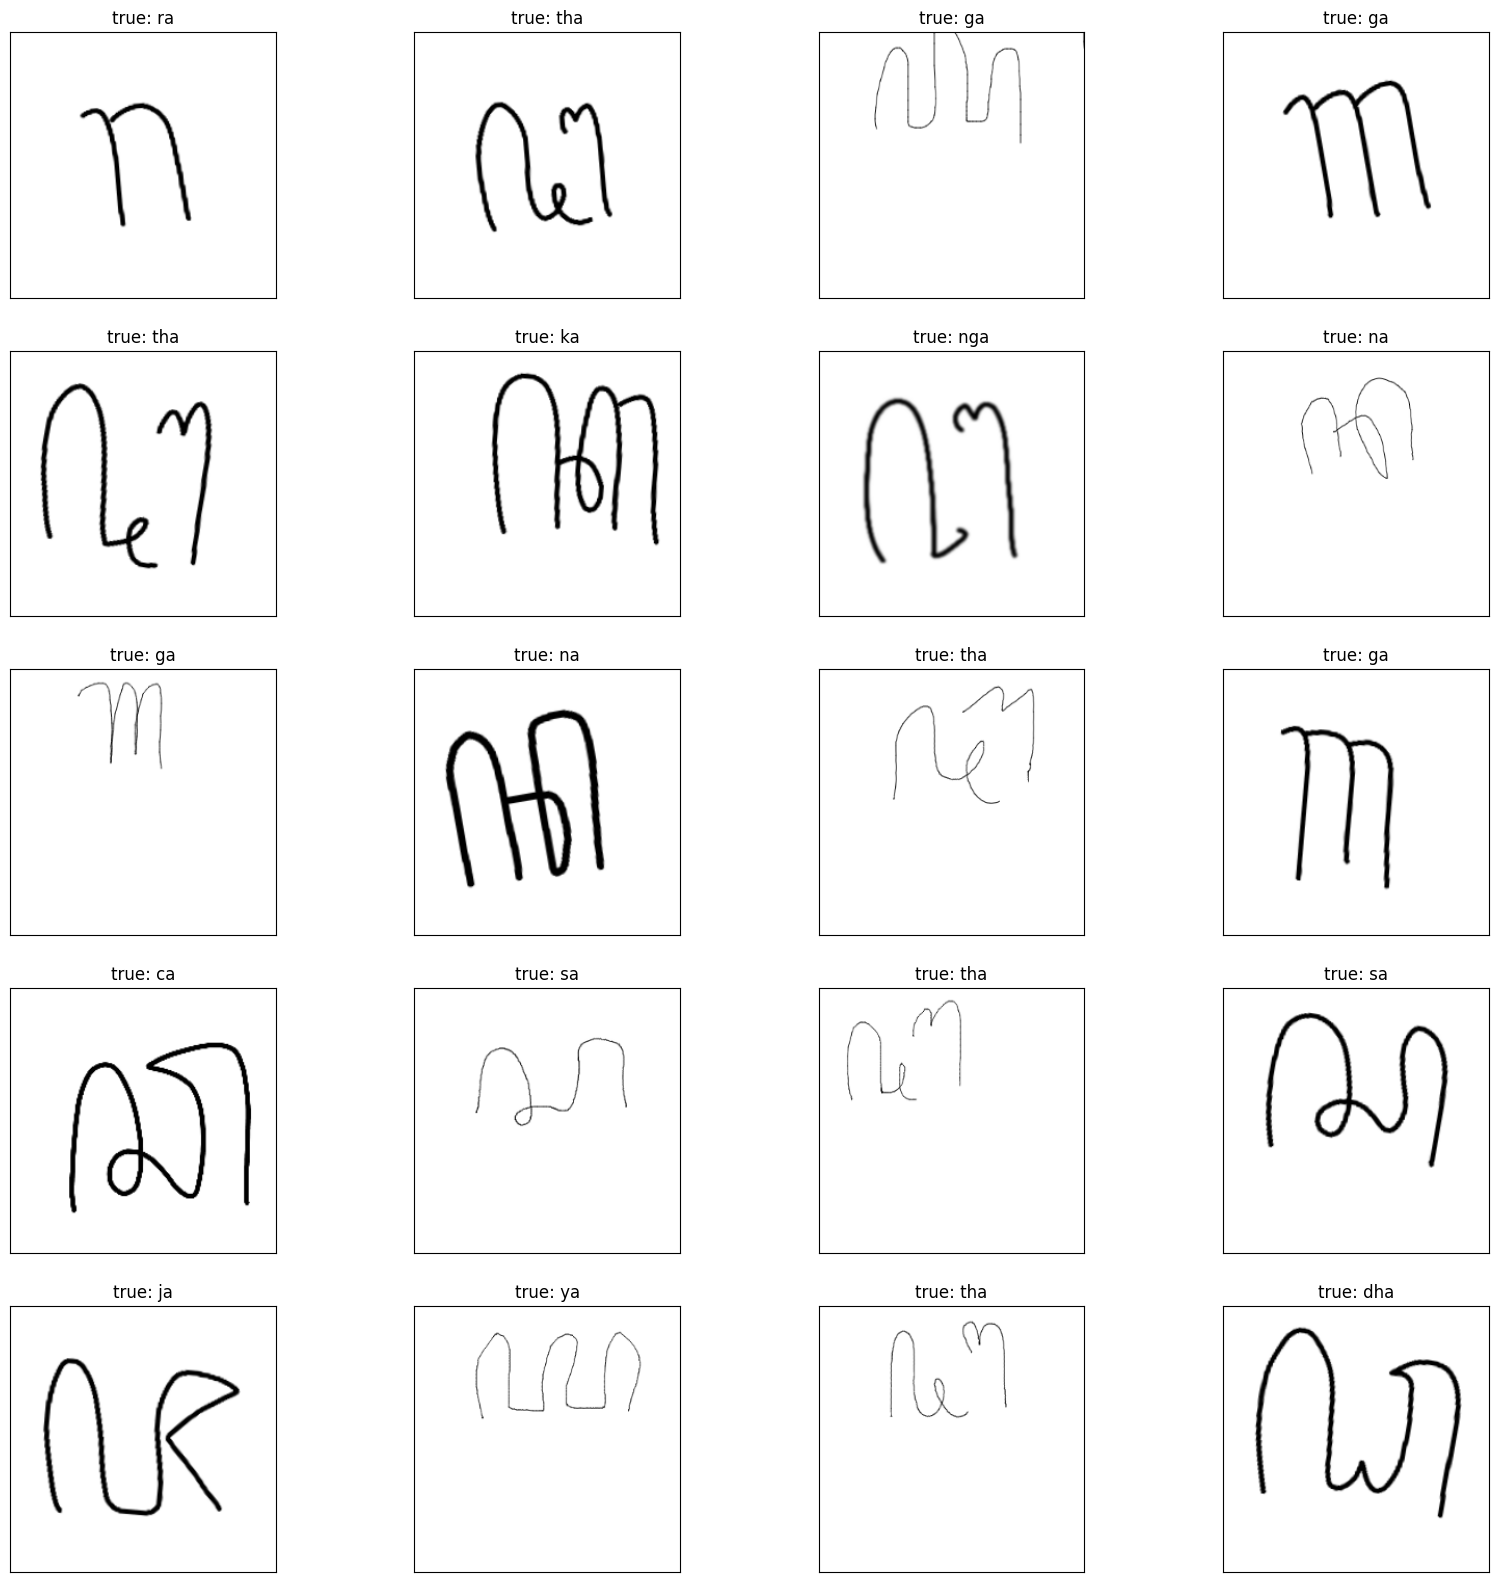

In [69]:
plot_images(train_dataset)

In [45]:
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image)
    plt.show()

## Preview Rescale

In [79]:
# img_path = "./dataset/merged/data/ca/4693358261014228548_base64_12.png"
img_path = "./dataset/merged/data/ca/ca2.theo.r10.png"

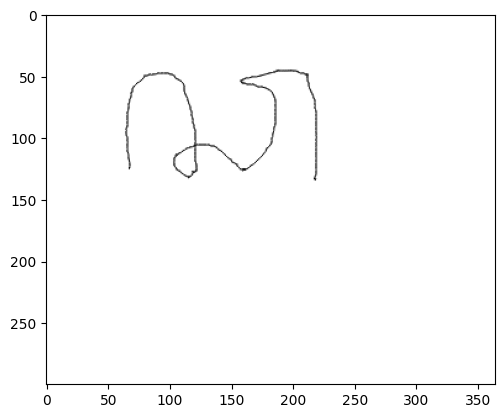

In [50]:
from PIL import Image

img_array = Image.open(img_path)
plot_image(img_array)

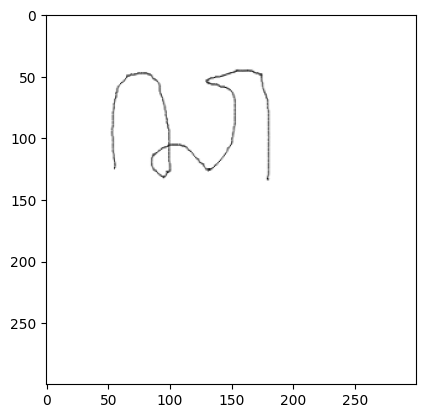

In [72]:
img_tensor = tf.io.read_file(img_path)
image = tf.image.decode_png(img_tensor)

# Rescale the image
rescaled_image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])

# Convert the image back to uint8
rescaled_image = tf.cast(rescaled_image, tf.uint8)

plot_image(rescaled_image)

## Preview Standardization

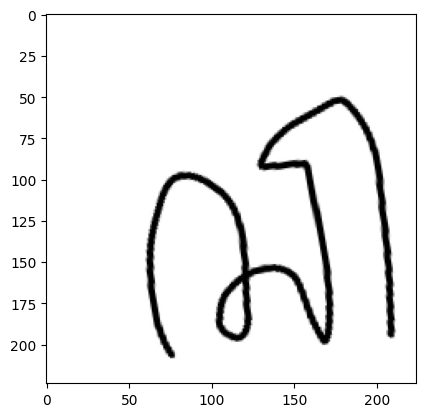

In [80]:
from PIL import Image

img_array = Image.open(img_path)
plot_image(img_array)

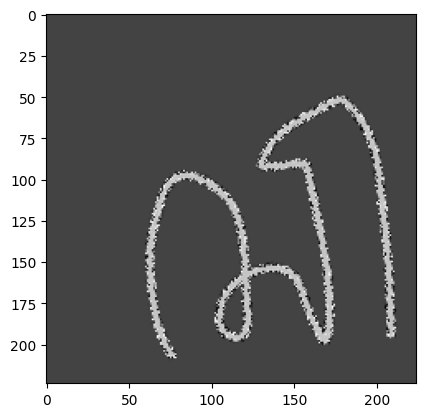

In [81]:
# Load the image
image = tf.io.read_file(img_path)
image = tf.image.decode_jpeg(image)

# Convert the image to float32
image = tf.image.convert_image_dtype(image, tf.float32)

# Standardize the image
standardized_image = tf.image.per_image_standardization(image)

# Convert the image back to uint8
standardized_image = tf.image.convert_image_dtype(standardized_image, tf.uint8)

# Save the standardized image
# tf.io.write_file('standardized_image.jpg', tf.image.encode_jpeg(standardized_image))

plot_image(standardized_image)

## Preview Augmentation

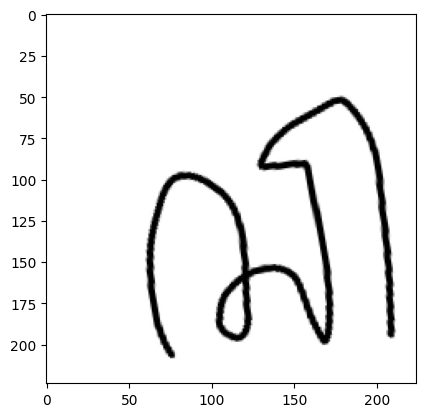

In [82]:
from PIL import Image, ImageFilter

# Load the image
image = Image.open(img_path)

plot_image(image)

# Apply rotation
image = image.rotate(15)

# Apply scaling
width, height = image.size
new_width = int(width * 0.9)
new_height = int(height * 0.9)
image = image.resize((new_width, new_height))

# Apply blur effect
image = image.filter(ImageFilter.GaussianBlur())

# Save the augmented image
# image.save('augmented_image.jpg')

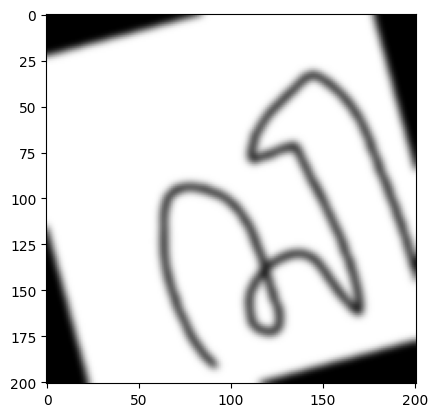

In [83]:
plot_image(image)

## Preview Data Split

In [91]:
import tensorflow as tf

# data path
data_path = './dataset/merged/data/'

# Load the data
data = tf.keras.preprocessing.image_dataset_from_directory(data_path)
data_size = len(data)

# Calculate the size of each split
train_size = int(0.9 * data_size)
val_size = int(0.05 * data_size)
test_size = int(0.05 * data_size)

# Shuffle the data
data = data.shuffle(buffer_size=data_size)

# Split the data
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)

Found 4213 files belonging to 20 classes.


In [92]:
print(train_size)
print(val_size)
print(test_size)

118
6
6
